# Ajuste/Métricas Regresión Logística

In [29]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [30]:
df = pd.read_pickle("../archivos/telco_churn_prep.pkl")
df.head()

,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-1.280248,-1.161694,-0.994194,1,0,0,1,1,0,1,...,0,1,0,0,2,0,0,0,2,No
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,0,...,1,0,0,2,0,2,0,1,3,No
2,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,0,...,0,1,0,2,2,0,0,0,3,Yes
3,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,1,...,1,0,0,2,0,2,2,1,0,No
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,2,Yes


In [31]:
mapa_churn = {'Yes': 1, 'No': 0}

In [32]:
df['churn'] = df['churn'].map(mapa_churn)

In [33]:
df

,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-1.280248,-1.161694,-0.994194,1,0,0,1,1,0,1,...,0,1,0,0,2,0,0,0,2,0
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,0,...,1,0,0,2,0,2,0,1,3,0
2,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,0,...,0,1,0,2,2,0,0,0,3,1
3,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,1,...,1,0,0,2,0,2,2,1,0,0
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,1,0,1,0,1,0,...,0,1,0,2,0,2,2,1,3,0
7028,1.612573,1.276493,2.241056,1,0,0,1,0,1,0,...,0,1,1,0,2,2,0,1,1,0
7029,-0.872808,-1.170004,-0.854514,1,0,0,1,0,1,1,...,0,1,0,2,0,0,0,0,2,0
7030,-1.158016,0.319168,-0.872095,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,0,3,1


## Ajuste sin balancear

In [34]:
X1 = df.drop("churn", axis = 1)
y1 = df["churn"]

In [35]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [36]:
log_reg= LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg.fit(x1_train,y1_train)

y_pred_train= log_reg.predict(x1_train)

y_pred_test= log_reg.predict(x1_test)

In [37]:
train1 = pd.DataFrame({'Real': y1_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y1_train)})
test1  = pd.DataFrame({'Real': y1_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y1_test)})
resultados1 = pd.concat([train1,test1], axis = 0)
resultados1.head()

,Real,Predicted,Set
6021,1,0,Train
3404,1,0,Train
5474,1,0,Train
5515,0,0,Train
6328,0,0,Train


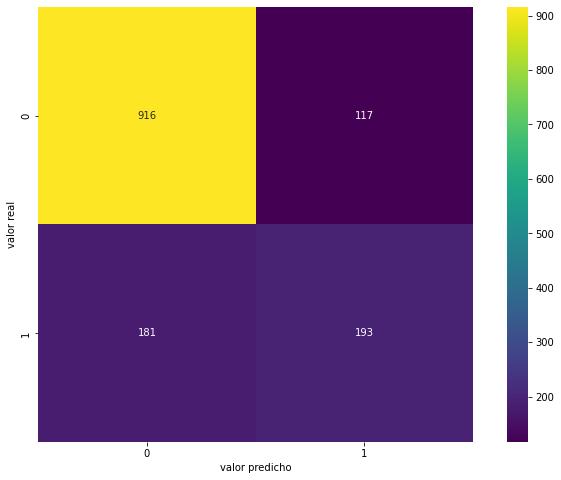

In [38]:
mat_lr1 = confusion_matrix(y1_test, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

0: se quedan

1: se van

## Ajuste balanceado

In [39]:
# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [40]:
df['churn'].value_counts()*100/df.shape[0]

churn
0    73.421502
1    26.578498
Name: count, dtype: float64

In [41]:
X2 = df.drop("churn", axis = 1)
y2 = df["churn"]

In [42]:
down = RandomUnderSampler()

In [43]:
X2_down, y2_down = down.fit_resample(X2,y2)

In [44]:
balanceado2 = pd.concat([X2_down, y2_down], axis = 1)
balanceado2.head()

,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-0.383881,0.852677,-0.073259,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,0,2,0
1,0.023559,0.879269,0.300338,0,1,0,1,1,0,0,...,1,0,1,0,0,0,0,0,2,0
2,1.123646,1.017217,1.556818,0,1,0,1,0,1,0,...,0,1,1,2,0,2,0,1,0,0
3,0.879182,0.711405,0.988591,1,0,0,1,0,1,0,...,0,1,0,0,2,2,2,0,2,0
4,-0.832064,-1.507395,-0.907015,1,0,1,0,1,0,0,...,1,0,2,1,1,1,1,0,0,0


In [45]:
balanceado2.to_pickle('../archivos/balanceado.pkl')

In [46]:
X2b = balanceado2.drop("churn", axis = 1)
y2b = balanceado2["churn"]

In [47]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2b, y2b, test_size = 0.2, random_state = 42)

In [48]:
log_reg2b= LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg2b.fit(x_train2,y_train2)

y_pred_train2b= log_reg2b.predict(x_train2)

y_pred_test2b= log_reg2b.predict(x_test2)

In [49]:
trainb = pd.DataFrame({'Real': y_train2, 'Predicted': y_train2, 'Set': ['Train']*len(y_train2)})
testb  = pd.DataFrame({'Real': y_test2,  'Predicted': y_test2,  'Set': ['Test']*len(y_test2)})
resultadosb = pd.concat([trainb,testb], axis = 0)
resultadosb.head()

,Real,Predicted,Set
485,0,0,Train
2170,1,1,Train
3291,1,1,Train
1097,0,0,Train
258,0,0,Train


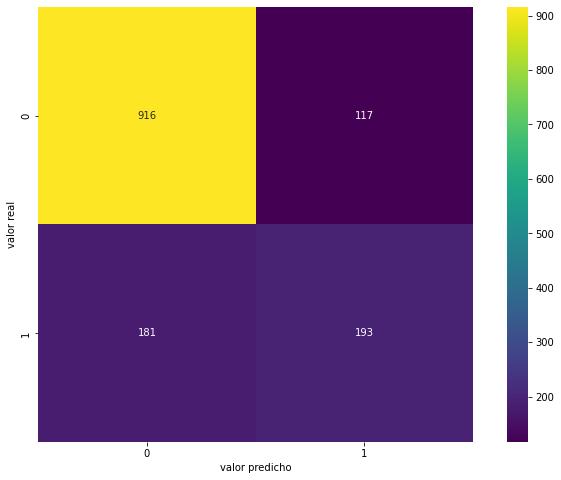

In [50]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test2b)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

## Métricas

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

In [52]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    
    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [53]:
resul_desb = metricas(y1_test, y_pred_test, y1_train, y_pred_train, "RLog desbalanceada")
resul_desb

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.788202,0.622581,0.516043,0.564327,0.426035,test,RLog desbalanceada
1,0.804267,0.655363,0.555853,0.601520,0.472950,train,RLog desbalanceada


In [54]:
resul_bal = metricas(y_test2, y_pred_test2b, y_train2, y_pred_train2b, "RLog balanceada")
resul_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.755348,0.731343,0.796748,0.762646,0.511184,test,RLog balanceada
1,0.758528,0.739237,0.801333,0.769034,0.516915,train,RLog balanceada


In [55]:
df_met_ajustes = pd.concat([resul_bal, resul_desb], axis= 0)

In [56]:
df_met_ajustes

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.755348,0.731343,0.796748,0.762646,0.511184,test,RLog balanceada
1,0.758528,0.739237,0.801333,0.769034,0.516915,train,RLog balanceada
0,0.788202,0.622581,0.516043,0.564327,0.426035,test,RLog desbalanceada
1,0.804267,0.655363,0.555853,0.601520,0.472950,train,RLog desbalanceada


In [57]:
df_met_ajustes.to_csv('../archivos/df_met_ajustes.csv')